In [1]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

In [2]:
filename = 'pokemon.csv'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com a prova!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo?')

Encontrei o arquivo pokemon.csv, tudo certo para prosseguir com a prova!


In [3]:
dados = pd.read_csv('pokemon.csv')
dados["classfication"]

0             Seed Pokémon
1             Seed Pokémon
2             Seed Pokémon
3           Lizard Pokémon
4            Flame Pokémon
              ...         
796         Launch Pokémon
797    Drawn Sword Pokémon
798      Junkivore Pokémon
799          Prism Pokémon
800     Artificial Pokémon
Name: classfication, Length: 801, dtype: object

In [4]:
print(list(dados))

['abilities', 'against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate', 'classfication', 'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name', 'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary']


In [5]:
tipos1 = dados['type1']
l = tipos1.value_counts()

tipos_pokemon=list(l.index) #todos os tipos

print(tipos_pokemon)

['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock', 'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon', 'steel', 'ice', 'fairy', 'flying']


In [59]:
colunas_numericas = ['type1','attack', 'base_total', 'defense', 'height_m', 'hp','sp_attack', 'sp_defense', 'speed','weight_kg']
dados_numericos=dados.loc[:,colunas_numericas]
dados_numericos['type1'] = dados_numericos['type1'].astype('category')
dados_numericos['type1'].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
dados_numericos

type1  attack  base_total  defense  height_m   hp  sp_attack  sp_defense  \
0       9      49         318       49       0.7   45         65          65   
1       9      62         405       63       1.0   60         80          80   
2       9     100         625      123       2.0   80        122         120   
3       6      52         309       43       0.6   39         60          50   
4       6      64         405       58       1.1   58         80          65   
..    ...     ...         ...      ...       ...  ...        ...         ...   
796    16     101         570      103       9.2   97        107         101   
797     9     181         570      131       0.3   59         59          31   
798     1     101         570       53       5.5  223         97          53   
799    14     107         600      101       2.4   97        127          89   
800    16      95         600      115       1.0   80        130         115   

     speed  weight_kg  
0       45        6.9  
1       60       13.0  
2       80      100.0  
3       65        8.5  
4       80       19.0  
..     ...        ...  
796     61      999.9  
797    109        0.1  
798     43      888.0  
799     79      230.0  
800     65       80.5  

[801 rows x 10 columns]

In [58]:
dados_numericos.describe()

attack  base_total     defense    height_m          hp   sp_attack  \
count  801.000000  801.000000  801.000000  781.000000  801.000000  801.000000   
mean    77.857678  428.377029   73.008739    1.163892   68.958801   71.305868   
std     32.158820  119.203577   30.769159    1.080326   26.576015   32.353826   
min      5.000000  180.000000    5.000000    0.100000    1.000000   10.000000   
25%     55.000000  320.000000   50.000000    0.600000   50.000000   45.000000   
50%     75.000000  435.000000   70.000000    1.000000   65.000000   65.000000   
75%    100.000000  505.000000   90.000000    1.500000   80.000000   91.000000   
max    185.000000  780.000000  230.000000   14.500000  255.000000  194.000000   

       sp_defense       speed   weight_kg  
count  801.000000  801.000000  781.000000  
mean    70.911361   66.334582   61.378105  
std     27.942501   28.907662  109.354766  
min     20.000000    5.000000    0.100000  
25%     50.000000   45.000000    9.000000  
50%     66.000000   65.000000   27.300000  
75%     90.000000   85.000000   64.800000  
max    230.000000  180.000000  999.900000

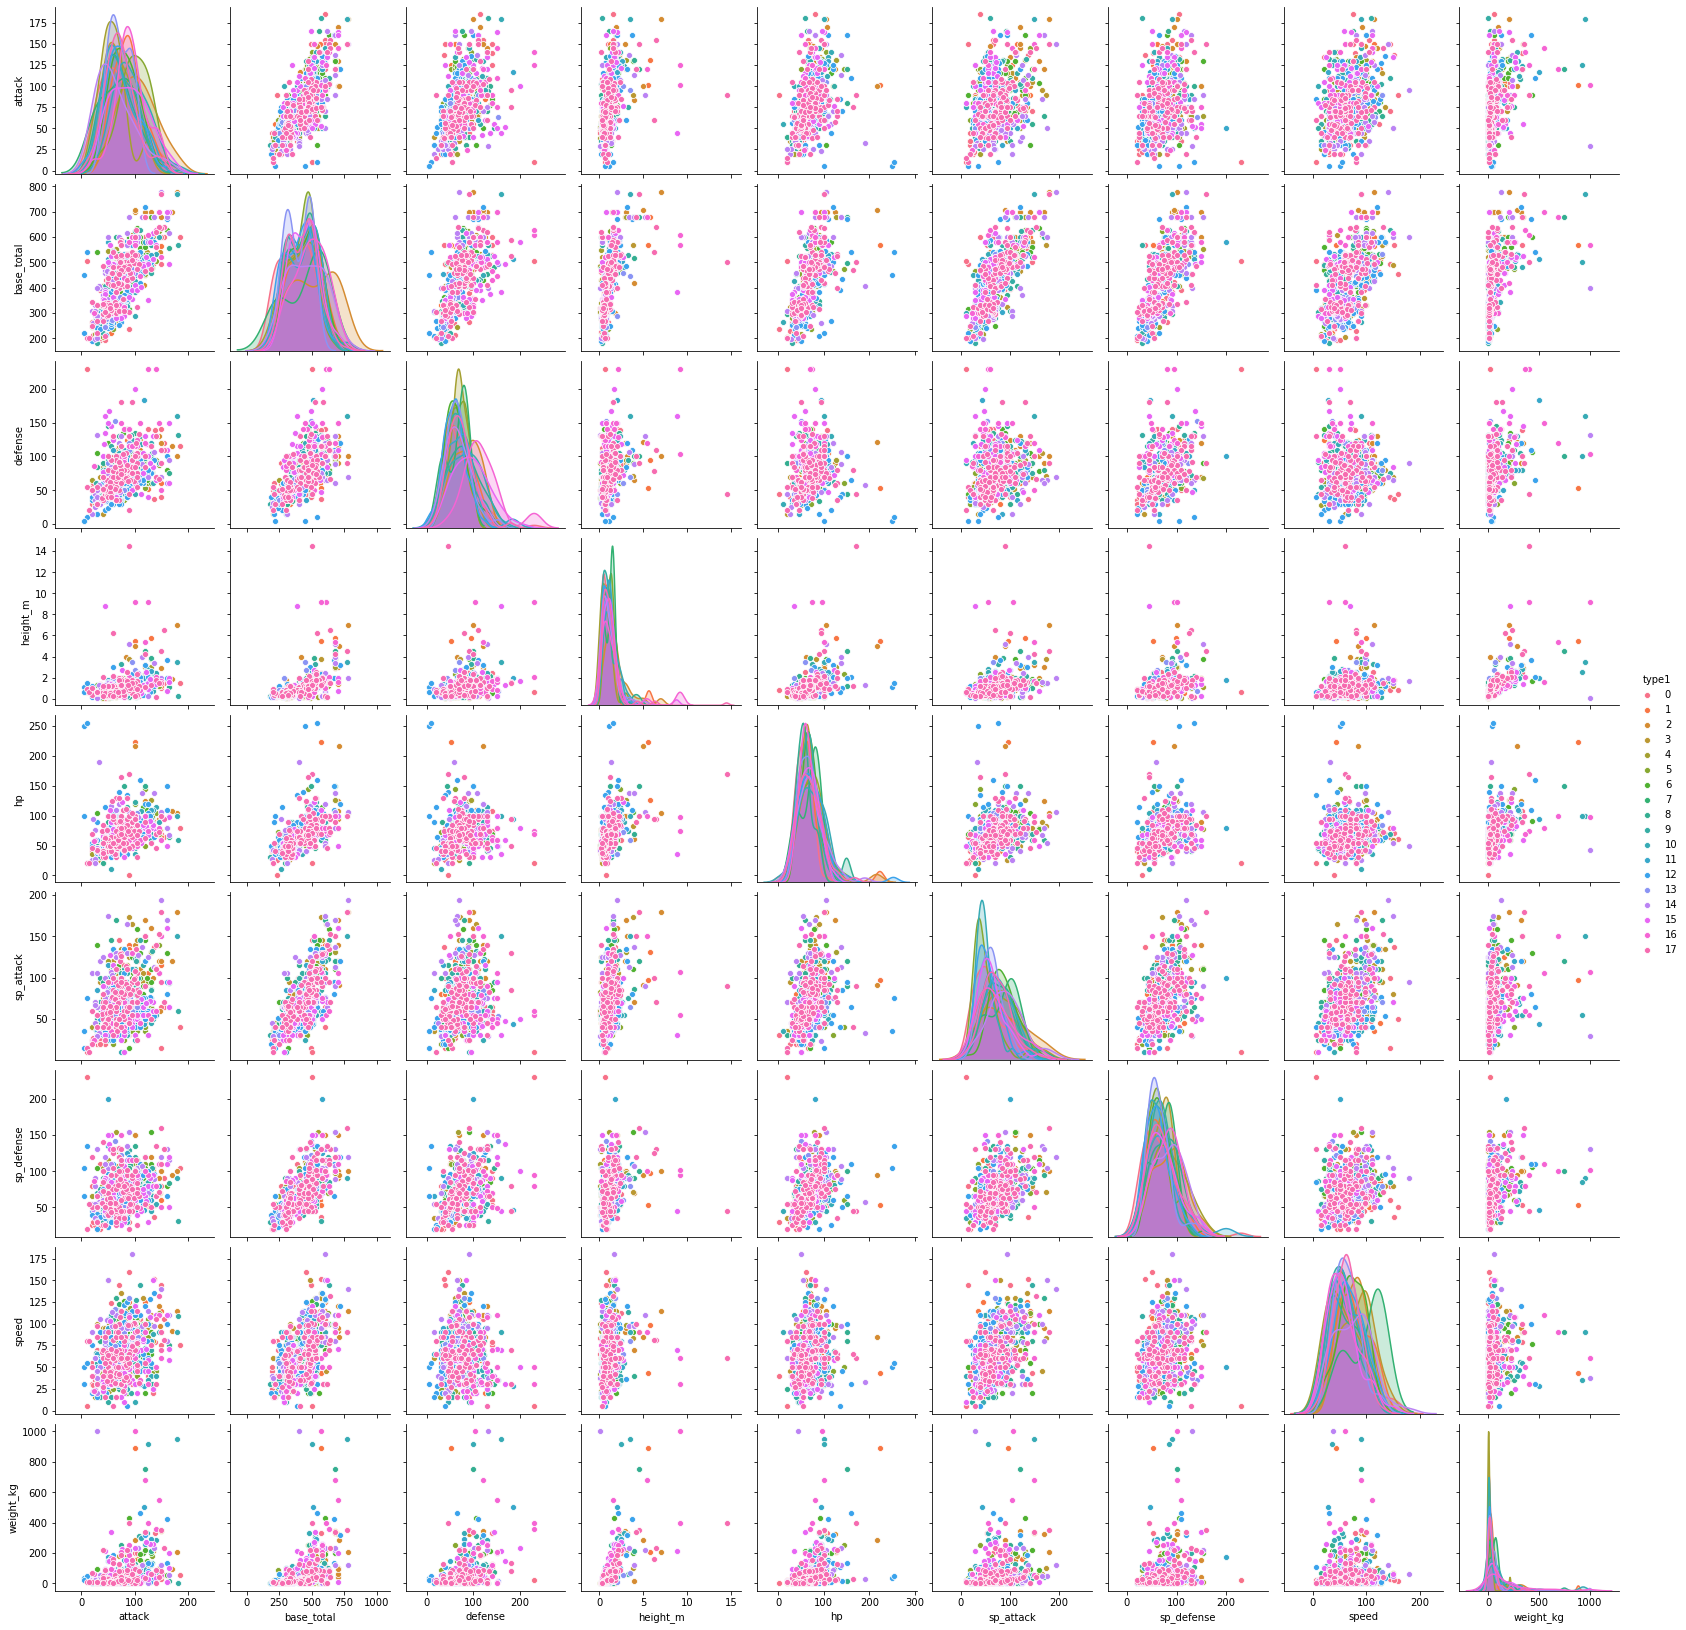

In [56]:
sns.pairplot(dados_numericos,hue='type1')

In [52]:
import statsmodels.api as sm 


x_dados = dados_numericos['speed'] # Definindo renda como explicativa
y_dados = dados_numericos['weight_kg']    # Definindo CO2 como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

# Define o modelo
model = sm.OLS(y_dados, x_dados)    

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              weight_kg   R-squared (uncentered):                   0.212
Model:                            OLS   Adj. R-squared (uncentered):              0.211
Method:                 Least Squares   F-statistic:                              215.4
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                    2.29e-43
Time:                        09:14:54   Log-Likelihood:                         -4900.6
No. Observations:                 801   AIC:                                      9803.
Df Residuals:                     800   BIC:                                      9808.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          0.7879      0.054     14.678      0.000       0.683       0.893
==============================================================================
Omnibus:                      813.813   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36267.295
Skew:                           4.787   Prob(JB):                         0.00
Kurtosis:                      34.543   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

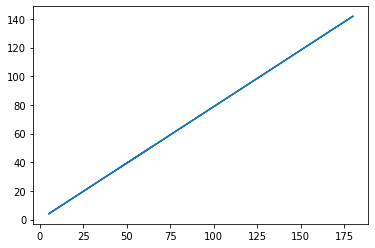

type1         0
attack        0
base_total    0
defense       0
height_m      0
hp            0
sp_attack     0
sp_defense    0
speed         0
weight_kg     0
dtype: int64

In [53]:
y = results.predict()
plt.plot(x_dados,y)
plt.show()
filtro_Nan = dados_numericos["height_m"].isnull()
filtro_Nan2 = dados_numericos["weight_kg"].isnull()
dados_numericos.loc[filtro_Nan,'height_m'] = 0
dados_numericos.loc[filtro_Nan2,'weight_kg'] = 0
dados_numericos.isnull().sum()

In [35]:
dados_train, dados_test = train_test_split(dados_numericos,test_size=0.40, random_state=42)
dados_train['type1'] = dados_train['type1'].astype('category')
dados_train['type1'].cat.categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]


<ipython-input-35-0b82a788f50d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_train['type1'] = dados_train['type1'].astype('category')


In [36]:
dados_train.type1

257    17
766     0
544     0
15     12
3       6
       ..
71     17
106     5
270    17
435    16
102     9
Name: type1, Length: 480, dtype: category
Categories (18, int64): [0, 1, 2, 3, ..., 14, 15, 16, 17]

In [26]:
from sklearn import tree
X = dados_train[['height_m','weight_kg']]
Y = dados_train['type1']
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

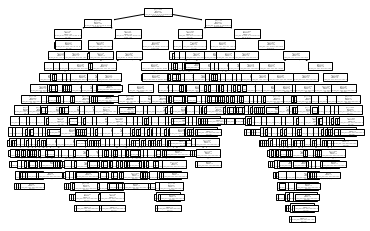

In [48]:
tree.plot_tree(clf);

In [27]:
dicionario = {'column_name':['height_m','weight_kg'],'feature_importances':list(clf.feature_importances_)}
df = pd.DataFrame(data=dicionario)
df.sort_values("feature_importances",ascending=False)

column_name  feature_importances
1   weight_kg             0.632517
0    height_m             0.367483

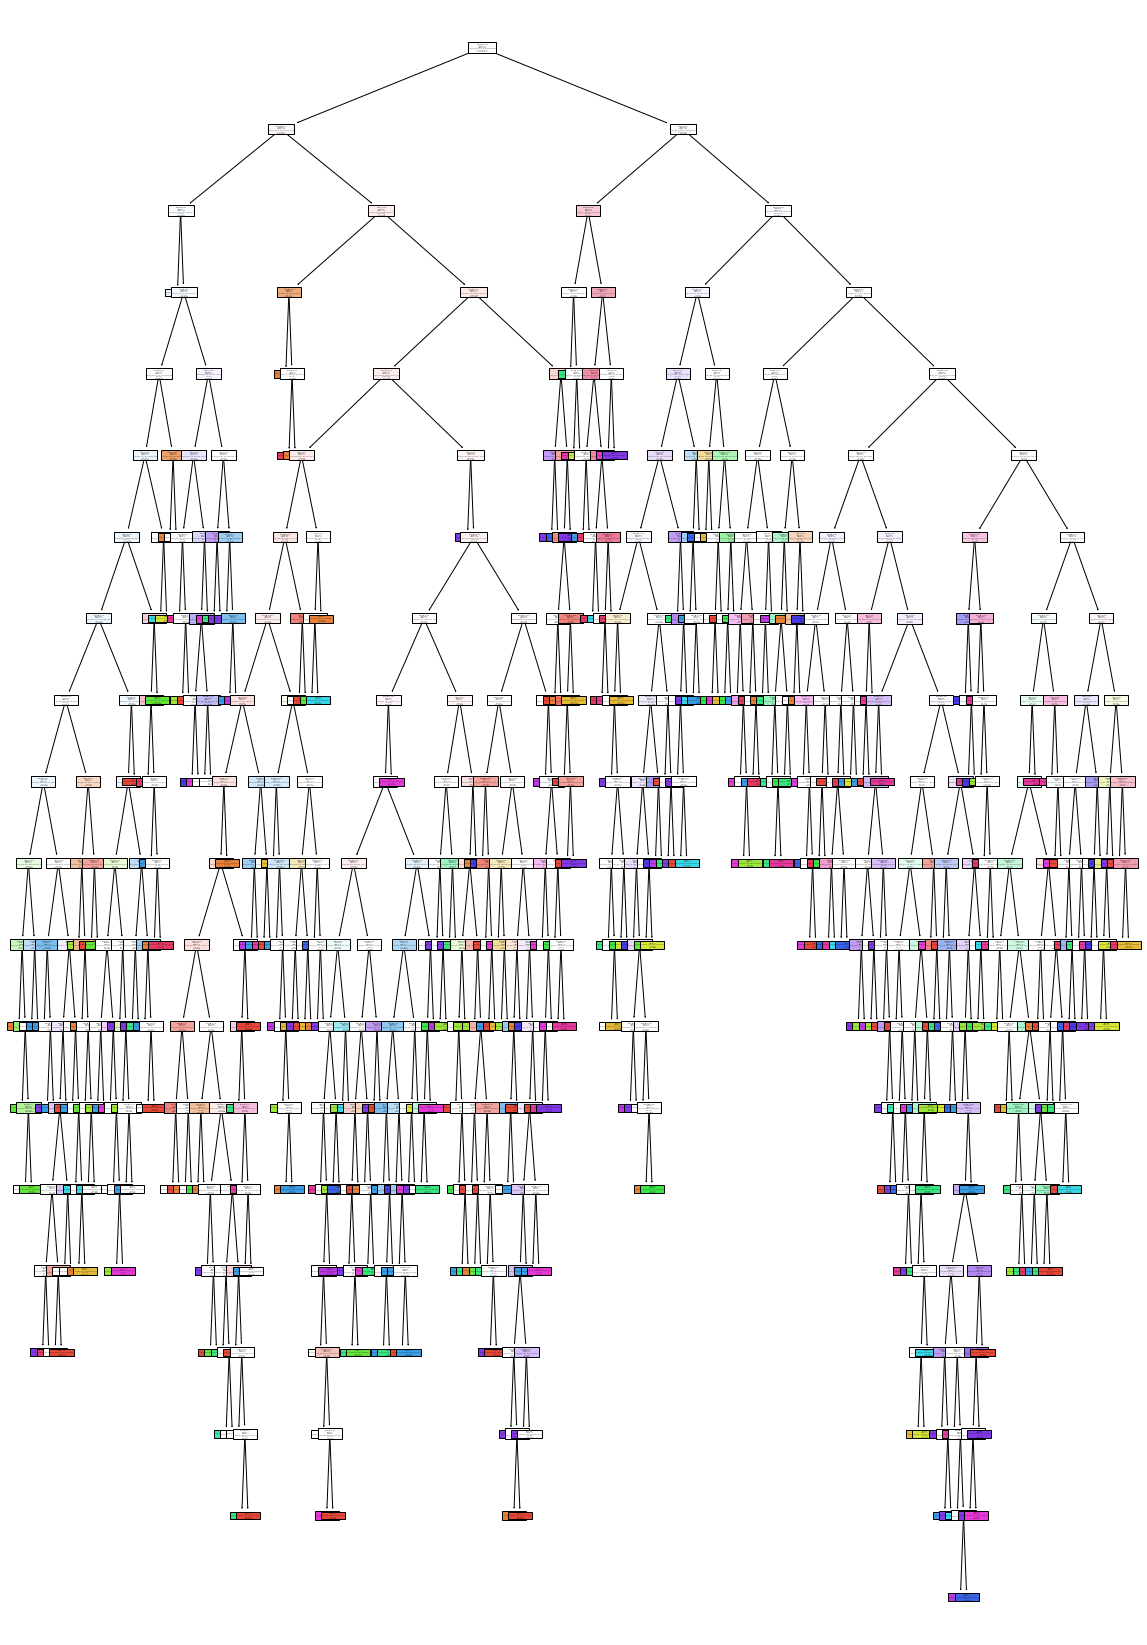

In [49]:
fig = plt.figure(figsize=(20,30))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,  
                   class_names=tipos_pokemon,
                   filled=True)
fig.savefig("decistion_tree.png")

In [51]:
clf.score(X,Y)

0.9166666666666666